In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial Data

In [2]:
points = np.array([[ 5, 7], [15, 12], [16, 18], [ 6, 6], [16, 11], [15, 11], [ 6, 4], [13, 13], [16, 17], [ 5, 5], [15, 17],  
[16, 17], [ 6, 8], [14, 12], [16, 15] ])
print(points)

print("-"*50)

centroids = np.array([[ 5, 12], [15, 4], [10, 17] ])
print(centroids)

[[ 5  7]
 [15 12]
 [16 18]
 [ 6  6]
 [16 11]
 [15 11]
 [ 6  4]
 [13 13]
 [16 17]
 [ 5  5]
 [15 17]
 [16 17]
 [ 6  8]
 [14 12]
 [16 15]]
--------------------------------------------------
[[ 5 12]
 [15  4]
 [10 17]]


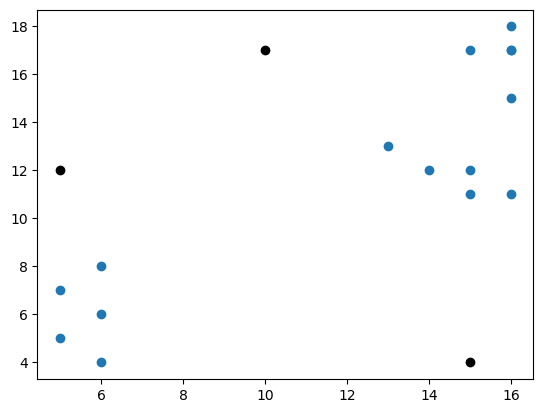

In [3]:
plt.scatter(points[:,0],points[:,1])
plt.scatter(centroids[:,0],centroids[:,1],color='black')
plt.show()

# Distance Function
using euclidean distance function to calculate distance from point to each cluster

In [4]:
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

dist(0,0,1,1)

1.4142135623730951

# Assign Partition
find distance from each point to every centroids and assign the cloest one as its cluster

In [5]:
def assign_partition(points,centroids):
    result = []
    for point in points:
        min_dist = float("inf")
        min_cluster = 0
        for c,cen in enumerate(centroids):
            p_dist = dist(point[0],point[1],cen[0],cen[1])

            if p_dist < min_dist:
                min_dist = p_dist
                min_cluster = c
        result.append(min_cluster)
    return np.array(result)

# Convert to Pandas
convert points and cluster to pandas since it is easy to manage and visualize

In [6]:
def assign_part_df(points, centroids, plot=True, figsize=(10, 6)):
    df = pd.DataFrame(points, columns=["x", "y"])
    df["cluster"] = assign_partition(points, centroids)
    
    fig, ax = None, None
    if plot:
        fig, ax = plt.subplots(figsize=figsize)
        df.plot.scatter(x="x", y="y", c="cluster", cmap="viridis", ax=ax)
        ax.scatter(centroids[:, 0], centroids[:, 1], color="black", s=100, marker='X')
    
    return df, ax

# Iteration
for each iteration, we assign partition and then plot also calculate new centroids by taking average value of each cluster to be new centroids.

In [7]:
def iterate_k_mean(points,centroids,plot=True,title=""):
    df,ax = assign_part_df(points,centroids,plot=plot)
    if ax is not None:
        ax.set_title(title)
        plt.show()
    new_centroids = df.groupby("cluster")[["x","y"]].mean().values
    return new_centroids
    

# Multiple Iteration with plot
with iteration 0 as initial data and continue for 3 iteration to see the change in centroids

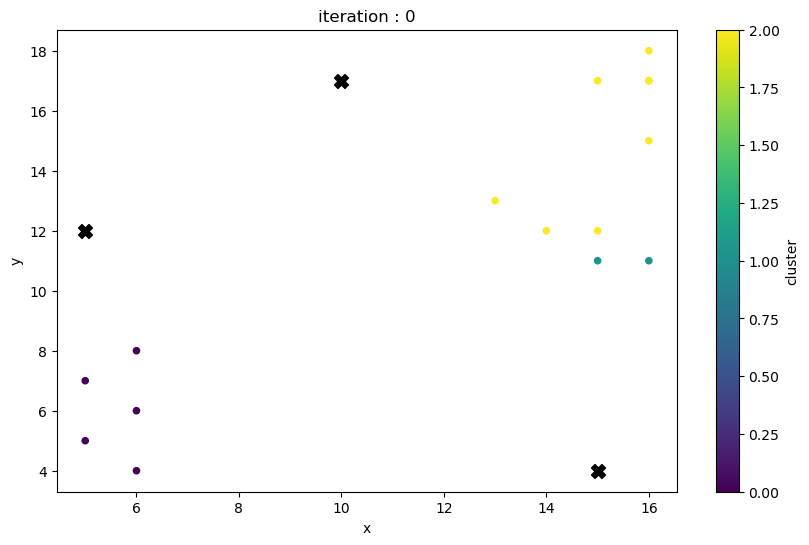

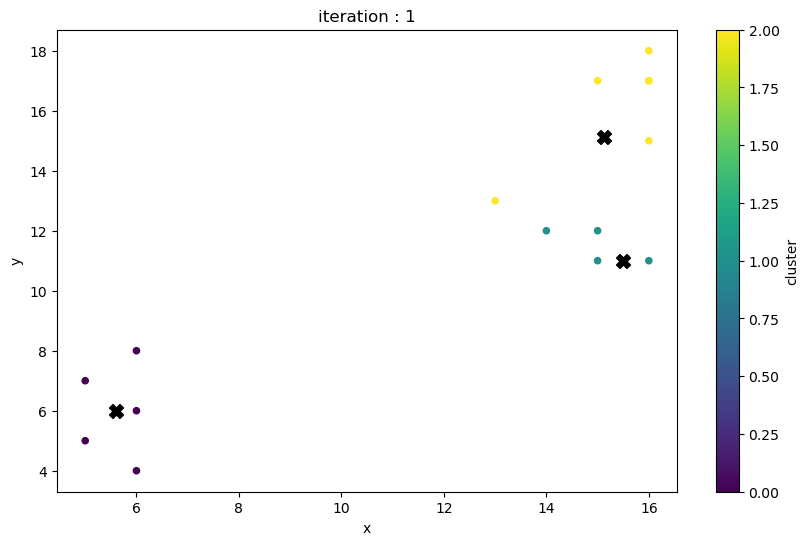

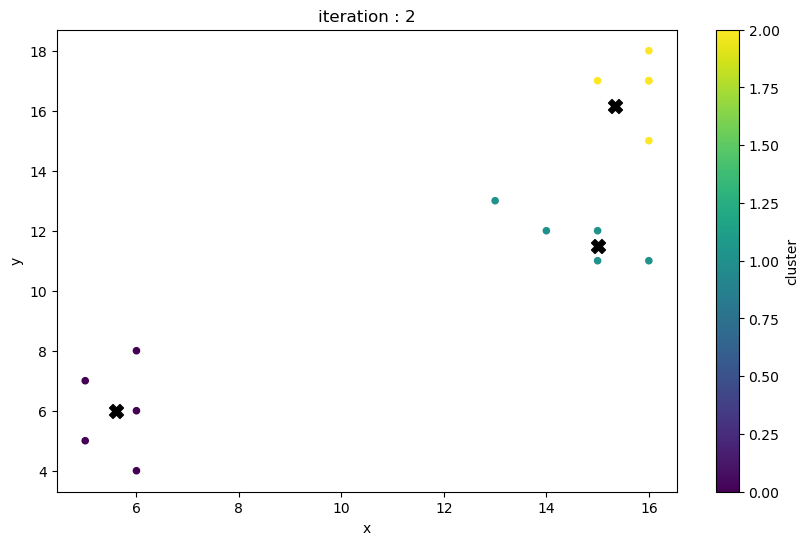

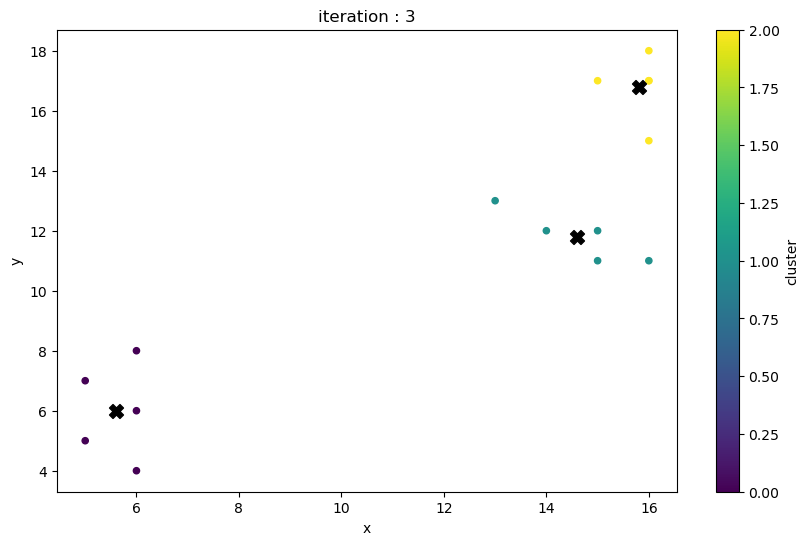

In [8]:
iteration = 3
for i in range(iteration+1):
    centroids = iterate_k_mean(points,centroids,title=f"iteration : {i}")